<a href="https://colab.research.google.com/github/rishithapemmireddy/internshiptasks/blob/main/Preprocessing_and_sentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
text = "Cats are running faster than dogs! Dogs aren't as clever as cats, but dogs are loyal."


In [2]:
text_lower = text.lower()
print(text_lower)


cats are running faster than dogs! dogs aren't as clever as cats, but dogs are loyal.


# Removing Stop Words
Stop words = common words (like is, are, the, and) that don’t add much meaning.

In [3]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
words = text_lower.split()
filtered_words = [w for w in words if w not in stop_words]
print(filtered_words)


['cats', 'running', 'faster', 'dogs!', 'dogs', 'clever', 'cats,', 'dogs', 'loyal.']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
import re

cleaned_text = re.sub(r'[^a-zA-Z\s]', '', text_lower)
print(cleaned_text)


cats are running faster than dogs dogs arent as clever as cats but dogs are loyal


# Tokenization


In [5]:
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize, sent_tokenize

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [6]:
sentence="Her cat's name is Luna. Her dog's name is max"
sent_tokenize(sentence)


["Her cat's name is Luna.", "Her dog's name is max"]

In [7]:
word_tokenize(sentence)

['Her',
 'cat',
 "'s",
 'name',
 'is',
 'Luna',
 '.',
 'Her',
 'dog',
 "'s",
 'name',
 'is',
 'max']

**Stemming**

In [8]:
from nltk.stem import PorterStemmer

In [9]:
ps=PorterStemmer()

In [10]:
connect_tokens=['connected','connecting','connection']

In [11]:
for t in connect_tokens:
  print(t,":",ps.stem(t))

connected : connect
connecting : connect
connection : connect


In [12]:
listen_tokens=["listened","listening","listen","listens"]
for t in listen_tokens:
  print(t,":",ps.stem(t))

listened : listen
listening : listen
listen : listen
listens : listen


Lemmatization

In [13]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [14]:
lemmatizer = WordNetLemmatizer()

In [15]:
for t in connect_tokens:
    print(t, " : ", lemmatizer.lemmatize(t))

connected  :  connected
connecting  :  connecting
connection  :  connection


N-Grams

In [16]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
tokens = ['the', 'rise', 'of', 'artificial', 'intelligence', 'has', 'led', 'to', 'significant', 'advancements', 'in', 'natural', 'language', 'processing', 'computer', 'vision', 'and', 'other', 'fields', 'machine', 'learning', 'algorithms', 'are', 'becoming', 'more', 'sophisticated', 'enabling', 'computers', 'to', 'perform', 'complex', 'tasks', 'that', 'were', 'once', 'thought', 'to', 'be', 'the', 'exclusive', 'domain', 'of', 'humans', 'with', 'the', 'advent', 'of', 'deep', 'learning', 'neural', 'networks', 'have', 'become', 'even', 'more', 'powerful', 'capable', 'of', 'processing', 'vast', 'amounts', 'of', 'data', 'and', 'learning', 'from', 'it', 'in', 'ways', 'that', 'were', 'not', 'possible', 'before', 'as', 'a', 'result', 'ai', 'is', 'increasingly', 'being', 'used', 'in', 'a', 'wide', 'range', 'of', 'industries', 'from', 'healthcare', 'to', 'finance', 'to', 'transportation', 'and', 'its', 'impact', 'is', 'only', 'set', 'to', 'grow', 'in', 'the', 'years', 'to', 'come']
print(tokens)

['the', 'rise', 'of', 'artificial', 'intelligence', 'has', 'led', 'to', 'significant', 'advancements', 'in', 'natural', 'language', 'processing', 'computer', 'vision', 'and', 'other', 'fields', 'machine', 'learning', 'algorithms', 'are', 'becoming', 'more', 'sophisticated', 'enabling', 'computers', 'to', 'perform', 'complex', 'tasks', 'that', 'were', 'once', 'thought', 'to', 'be', 'the', 'exclusive', 'domain', 'of', 'humans', 'with', 'the', 'advent', 'of', 'deep', 'learning', 'neural', 'networks', 'have', 'become', 'even', 'more', 'powerful', 'capable', 'of', 'processing', 'vast', 'amounts', 'of', 'data', 'and', 'learning', 'from', 'it', 'in', 'ways', 'that', 'were', 'not', 'possible', 'before', 'as', 'a', 'result', 'ai', 'is', 'increasingly', 'being', 'used', 'in', 'a', 'wide', 'range', 'of', 'industries', 'from', 'healthcare', 'to', 'finance', 'to', 'transportation', 'and', 'its', 'impact', 'is', 'only', 'set', 'to', 'grow', 'in', 'the', 'years', 'to', 'come']


In [18]:
#unigram
unigrams=(pd.Series(nltk.ngrams(tokens,1)).value_counts())
print(unigrams)

(to,)       7
(of,)       6
(the,)      4
(in,)       4
(and,)      3
           ..
(only,)     1
(set,)      1
(grow,)     1
(years,)    1
(come,)     1
Name: count, Length: 79, dtype: int64


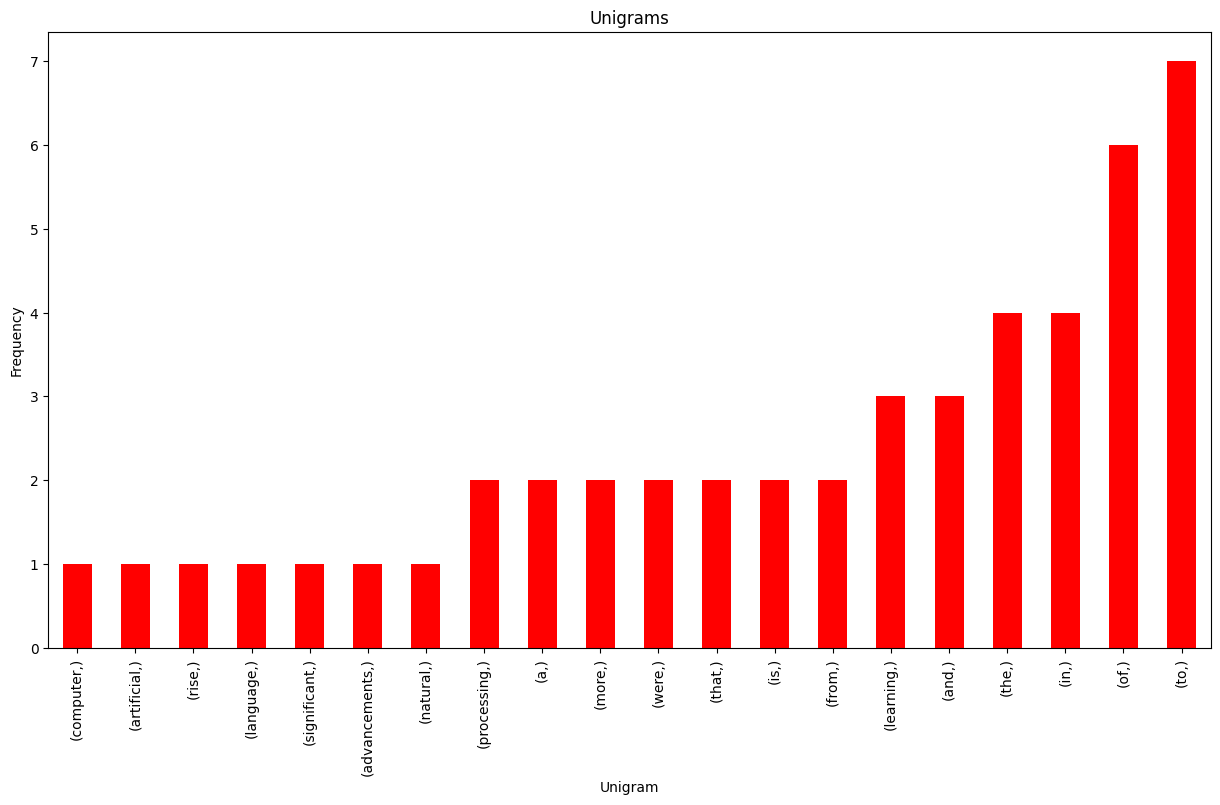

In [19]:
unigrams[0:20].sort_values().plot.bar(color='red', width=.5 , figsize=(15,8))
plt.title('Unigrams')
plt.xlabel('Unigram')
plt.ylabel('Frequency')
plt.show()

In [20]:
bigrams=pd.Series(nltk.ngrams(tokens,2)).value_counts()
print(bigrams)

(that, were)                  2
(rise, of)                    1
(of, artificial)              1
(artificial, intelligence)    1
(intelligence, has)           1
                             ..
(grow, in)                    1
(in, the)                     1
(the, years)                  1
(years, to)                   1
(to, come)                    1
Name: count, Length: 105, dtype: int64


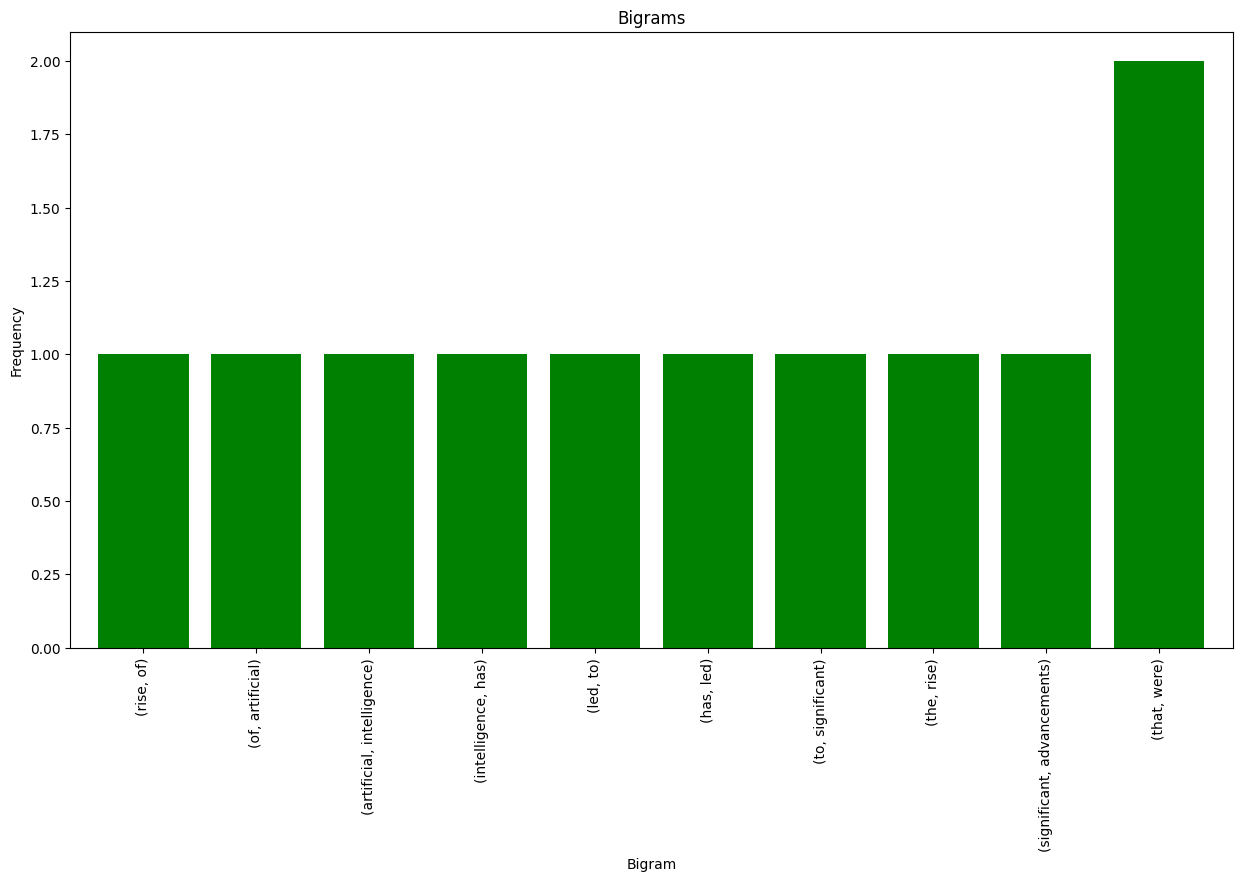

In [21]:
bigrams[0:10].sort_values().plot.bar(color='green',width=.8, figsize=(15,8))
plt.title('Bigrams')
plt.xlabel('Bigram')
plt.ylabel('Frequency')
plt.show()

# TextBlob

In [22]:
sentence_1 = "i had a great time at the movie it was really funny"
sentence_2 = "i had a great time at the movie but the parking was terrible"
sentence_3 = "i had a great time at the movie but the parking wasn't great"
sentence_4 = "i had a great time at the movie but the parking was not great"
sentence_5 = "i went to see a movie"

In [23]:
from textblob import TextBlob

In [24]:
print(sentence_1)
sentence_score_1=TextBlob(sentence_1)
print(sentence_score_1.sentiment.polarity)
#above 0 positive

i had a great time at the movie it was really funny
0.525


In [25]:
print(sentence_2)
sentence_score_2=TextBlob(sentence_2)
print(sentence_score_2.sentiment.polarity)

i had a great time at the movie but the parking was terrible
-0.09999999999999998


In [26]:
print(sentence_3)
sentence_score_3=TextBlob(sentence_3)
print(sentence_score_3.sentiment.polarity)

i had a great time at the movie but the parking wasn't great
0.8


# VEDA

In [27]:
!pip install vaderSentiment


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 6.4 MB/s eta 0:00:00


In [28]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [29]:
vader_sentiment = SentimentIntensityAnalyzer()

In [30]:
print(sentence_1)
print(vader_sentiment.polarity_scores(sentence_1))

i had a great time at the movie it was really funny
{'neg': 0.0, 'neu': 0.578, 'pos': 0.422, 'compound': 0.807}


In [31]:
print(sentence_2)
print(vader_sentiment.polarity_scores(sentence_2))

i had a great time at the movie but the parking was terrible
{'neg': 0.234, 'neu': 0.621, 'pos': 0.144, 'compound': -0.3818}


In [32]:
print(sentence_3)
print(vader_sentiment.polarity_scores(sentence_3))

i had a great time at the movie but the parking wasn't great
{'neg': 0.247, 'neu': 0.611, 'pos': 0.142, 'compound': -0.4387}


# **Sentiment Analysis**

* Apply rule-based sentiment analysis
(e.g., VADER/Text Blob)

In [33]:
!pip install vaderSentiment textblob nltk


In [34]:
import nltk
from nltk.corpus import movie_reviews
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

nltk.download('movie_reviews')

documents=[(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]

# Convert words into full sentences
reviews = [(" ".join(words), category) for words, category in documents]
print(f"Total reviews: {len(reviews)}")
print("Example:", reviews[0])

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


Total reviews: 2000
Example: ('plot : two teen couples go to a church party , drink and then drive . they get into an accident . one of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . what \' s the deal ? watch the movie and " sorta " find out . . . critique : a mind - fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . which is what makes this review an even harder one to write , since i generally applaud films which attempt to break the mold , mess with your head and such ( lost highway & memento ) , but there are good and bad ways of making all types of films , and these folks just didn \' t snag this one correctly . they seem to have taken this pretty neat concept , but executed it terribly . so what are the problems with the movie ? well , its main problem is that it \' s simply too jumbled . it starts off " normal " but then downshifts into this " fantasy " world in which you , as

In [35]:
def textblob_sentiment(text):
    score = TextBlob(text).sentiment.polarity
    if score > 0:
        return "pos"
    elif score < 0:
        return "neg"
    else:
        return "neu"

textblob_results = [(text, textblob_sentiment(text), label) for text, label in reviews[:100]]



In [36]:
vader_analyzer = SentimentIntensityAnalyzer()

def vader_sentiment(text):
    score = vader_analyzer.polarity_scores(text)
    if score['compound'] >= 0.05:
        return "pos"
    elif score['compound'] <= -0.05:
        return "neg"
    else:
        return "neu"

# Evaluate first 100 reviews
vader_results = [(text, vader_sentiment(text), label) for text, label in reviews[:100]]

In [37]:
def accuracy(results):
    correct = sum([1 for _, pred, actual in results if pred == actual])
    return correct / len(results)

print("VADER Accuracy (first 100 reviews):", accuracy(vader_results))
print("TextBlob Accuracy (first 100 reviews):", accuracy(textblob_results))


VADER Accuracy (first 100 reviews): 0.4
TextBlob Accuracy (first 100 reviews): 0.21


In [ ]:
print("\n🔎 Test with your own review")
user_review = input("Enter your movie review: ")

vader_prediction = vader_sentiment(user_review)
textblob_prediction = textblob_sentiment(user_review)

print(f"\nYour Review: {user_review}")
print(f"VADER says: {vader_prediction}")
print(f"TextBlob says: {textblob_prediction}")



🔎 Test with your own review
